# **Homework 01**
*Name*: **Gildas**



# **Preparations!**

## **Mounting the Drive**

In [116]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Custom print function!**

In [117]:

######
''' Define the rtf/txt file path '''
output_file_path = "/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Class/ML_HW1/Outputs/ML_HW1_output.txt"

''' Open output file in write mode and clear its contents (if it exists) '''
output_file = open(output_file_path, 'w')
output_file.close()  # This will clear the contents if the file already exists

''' Reopen the output file in append mode to keep it open '''
output_file = open(output_file_path, 'a')

''' Define a custom "pseudo personal print" function '''
def perprint(message, end = '\n', file = output_file):
    print(message, end = end)
    print(message, end = end, file = file) # Can delete this line & 'file' from function inputs
######

perprint("\nStarting...\n\n")



Starting...




# **Getting started now!**

*Please write a program that can do regularized linear model regression (polynomial basis) and visualization.*

*You should do it by closed-form LSE approach, Steepest descent, and Newton's method.*


**NOTE:**

*Use whatever programming language you prefer.*

*You should use as few functions from any library as possible. That would be great if you implement all detail operations (like matrix operations) by yourself.*

*Time complexity is not what we care for now, but if you like to improve it in that regard, it is always good for you.*


**Grading policy:**

*You must implement matrix inverse operation by yourself. Please do not use the built in package or you'll not get 100.*

## **Paths and directories for input and output files!**

In [118]:
import os

# Input file path
input_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Class/ML_HW1/Cat_Testfile.txt'

# Output directory
output_folder = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Class/ML_HW1/Outputs'

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)


## **Import Packages!**

In [119]:

import numpy as np
import matplotlib.pyplot as plt


## **All functions!**

In [120]:

# New matrix A based on integer n of polynomial
def add_polynomial_columns(matrix, n):

    num_rows = matrix.shape[0]
    # Create a new matrix to store the result with additional columns
    result_matrix = np.zeros((num_rows, n))
    # Fill the new matrix with the polynomial values
    for i in range(n):
        result_matrix[:, i] = matrix[:, 0] ** i

    return result_matrix


# To create an identity matrix
def create_identiy_matrix(shape_of_matrix):
    identity_matrix = np.zeros((shape_of_matrix, shape_of_matrix))
    for i in range(shape_of_matrix):
        identity_matrix[i, i] = 1
    return identity_matrix


def multiply_matrices(matrix_a, matrix_b):
    if matrix_a.shape[1] != matrix_b.shape[0]:
        raise ValueError("Number of columns in matrix A must be equal to the number of rows in matrix B.")

    result_matrix = np.zeros((matrix_a.shape[0], matrix_b.shape[1]))

    for i in range(matrix_a.shape[0]):
        for j in range(matrix_b.shape[1]):
            for k in range(matrix_a.shape[1]):
                result_matrix[i, j] += matrix_a[i, k] * matrix_b[k, j]

    return result_matrix


def add_matrices(matrix_a, matrix_b):
    if matrix_a.shape != matrix_b.shape:
        raise ValueError("Matrices must have the same dimensions for addition.")

    result_matrix = np.zeros(matrix_a.shape)

    for i in range(matrix_a.shape[0]):
        for j in range(matrix_a.shape[1]):
            result_matrix[i, j] = matrix_a[i, j] + matrix_b[i, j]

    return result_matrix


# To create matrix with only the signs of its elements
def sign_matrix_elements(matrix):
    number_rows = matrix.shape[0]
    number_columns = matrix.shape[1]

    matrix_with_signs = np.zeros(matrix.shape)

    for i in range(number_rows):
        for j in range(number_columns):
            if matrix[i, j] > 0:
                matrix_with_signs[i, j] = 1
            elif matrix[i, j] < 0:
                matrix_with_signs[i, j] = -1

    return matrix_with_signs


def transpose_matrix(matrix):
    # Get the number of rows and columns in the original matrix
    num_rows, num_cols = len(matrix), len(matrix[0])

    # Create a new matrix with swapped dimensions
    transposed_matrix = np.empty((num_cols, num_rows))

    # Fill the transposed matrix with the values from the original matrix
    for i in range(num_rows):
        for j in range(num_cols):
            transposed_matrix[j][i] = matrix[i][j]

    return transposed_matrix


# LU Decomposition of a matrix
def lu_decomposition(matrix_decomposed):

  L = np.eye(matrix_decomposed.shape[0], dtype=float)
  U = matrix_decomposed.astype(float)

  for i in range(1, matrix_decomposed.shape[0]):
    for j in range(i):
      L[i, j] = U[i, j] / U[j, j]
      U[i, :] -= L[i, j] * U[j, :]

  # Convert the L and U matrices to NumPy arrays
  L = np.array(L)
  U = np.array(U)

  return L, U


def generate_polynomial_equation(coefficients):
    equation = ""

    n = len(coefficients)

    for i in reversed(range(n)):  # Start with the highest-degree term
        coef = coefficients[i][0]

        # Skip terms with a coefficient of 0
        if coef == 0:
            continue

        # Determine the term based on the coefficient and exponent
        if i == 0:
            if coef < 0:
                sign = "-"
            else:
                sign = "+"
            coef_str = str(abs(coef))
            term = f" {sign} {coef_str}"  # For x^0 term (constant)
        elif i == n-1:
            sign = "" if coef >= 0 else "-"
            coef_str = str(abs(coef))
            term = f" {sign} {coef_str}x^{i}"
        else:
            sign = "+" if coef >= 0 else "-"
            coef_str = str(abs(coef))
            term = f" {sign} {coef_str}x^{i}"

        # Add the term to the equation
        equation += term

    return equation


def matrix_inverse_by_lu(matrix_to_inverse):
    # Step 1: LU decomposition with L having 1s on the diagonal
    lower_matrix, upper_matrix = lu_decomposition(matrix_to_inverse)

    dimension = matrix_to_inverse.shape[0]
    identity = np.eye(dimension, dtype=float)
    matrix_inverse = np.zeros((dimension, dimension), dtype=float)

    # Step 2: Solve Ly = I for each column of the inverse
    for i in range(dimension):
        y = np.zeros((dimension, 1), dtype=float)
        q = identity[:, i].reshape(-1, 1)

        # Forward substitution
        for j in range(dimension):
            y[j] = q[j] - np.dot(lower_matrix[j, :j], y[:j])

        # Step 3: Solve Ux = y for each column of the inverse
        x = np.zeros((dimension, 1), dtype=float)

        # Backward substitution
        for j in reversed(range(dimension)):
            x[j] = (y[j] - np.dot(upper_matrix[j, j+1:], x[j+1:])) / upper_matrix[j, j]

        matrix_inverse[:, i] = x.ravel()

    return matrix_inverse


def total_error(y_pred, y_actual):

    if y_pred.shape != y_actual.shape:
        raise ValueError("Input arrays must have the same shape. \n")

    # Total errors
    squared_errors = multiply_matrices(transpose_matrix(add_matrices(y_pred, - y_actual)), add_matrices(y_pred, - y_actual))

    return float(squared_errors)


def steepest_descent_with_LSE_AND_L1(design_matrix, matrix_targets, n,
                                     lambda_value, max_iteration, learning_rate):

    # Initialize parameters
    number_examples = design_matrix.shape[0]
    transpose = transpose_matrix(design_matrix)
    # Initialize weights
    weight_by_gradient_descent = np.zeros((n, 1))

    for i in range(max_iteration):
        y_pred = multiply_matrices(design_matrix, weight_by_gradient_descent)

        error_iteration = total_error(y_pred, matrix_targets)
        cost = error_iteration / (2 * number_examples)

        # Compute gradients for LSE = (1/2) * (matrix_target - design_matrix *
        # weight_matrix)^T * (matrix_target - design_matrix * weight_matrix)
        residuals = add_matrices(y_pred, - matrix_targets)
        gradients = (multiply_matrices(transpose, residuals)
                     + lambda_value * sign_matrix_elements(weight_by_gradient_descent))

        # Update weights
        weight_by_gradient_descent -= learning_rate * gradients

    return weight_by_gradient_descent


def Newton_method_with_LSE(design_matrix, matrix_targets, n, num_iterations, tolerance):

    # Initialize parameters
    number_examples = design_matrix.shape[0]
    transpose = transpose_matrix(design_matrix)
    # Initialize weights
    weight_Newton_with_LSE = 50 * np.ones((n, 1))

    for iteration in range(num_iterations):
        y_pred = multiply_matrices(design_matrix, weight_Newton_with_LSE)

        # Compute gradients for LSE = (1/2) * (matrix_target - design_matrix *
        # weight_matrix)^T * (matrix_target - design_matrix * weight_matrix)
        residuals = add_matrices(y_pred, - matrix_targets)
        design_matrix_squared = multiply_matrices(transpose, design_matrix)
        gradients = 2 * multiply_matrices(transpose, residuals)

        # Calculate the Hessian matrix (second derivative of the cost function)
        hessian = 2 * multiply_matrices(transpose, design_matrix)

        # Update the parameters using Newton's method
        weight_Newton_with_LSE -= multiply_matrices(matrix_inverse_by_lu(hessian), gradients)

        # Check for convergence
        if np.linalg.norm(gradients) < tolerance:
            # print(f"Converged after {iteration} iterations.")
            break

    return weight_Newton_with_LSE



def print_case_elements(i, n, λ, A, b, design_matrix, design_matrix_for_plotting, identity_matrix, transpose, A_for_plotting, max_iterations, learning_rate, tolerance, output_dir):

    # Create subplots with 3 rows and 1 column
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))

    # Loop through subplots and set custom ticks and axes limits
    x_ticks = np.arange(-6, 7, 2)  # Generate ticks from -6 to 6 with a step of 2
    y_ticks = np.arange(0, 101, 20)
    for ax in axes.flat:
        ax.set_xlim([-6, 6])
        ax.set_ylim([-15, 120])
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

    j = 0
    ####################
    perprint("\tLSE: ")
    ####################
    # Closed-form LSE solution with L2 regularization: W = (λI + A^T * A)^-1 * A^T * b
    Weights = multiply_matrices(multiply_matrices(matrix_inverse_by_lu(add_matrices(
                λ*identity_matrix, multiply_matrices(transpose, design_matrix))), transpose), b)
    perprint(f"\tFitting line: {generate_polynomial_equation(Weights)}")
    predictions = multiply_matrices(design_matrix, Weights)
    perprint(f"\tTotal error: {total_error(predictions, b)}\n")
    # Plot for LSE
    predictions_for_plotting = multiply_matrices(design_matrix_for_plotting, Weights)
    axes[j].scatter(A, b, color='r')
    axes[j].plot(A_for_plotting, predictions_for_plotting)
    subplot_title = "Case " + str(i+1) + ": LSE"
    axes[j].set_title(subplot_title)

    j = 1
    ####################
    perprint("\tSteepest Descent: ")
    ####################
    Weights = steepest_descent_with_LSE_AND_L1(design_matrix, b, n, λ, max_iterations, learning_rate)
    perprint(f"\tFitting line: {generate_polynomial_equation(Weights)}")
    predictions = multiply_matrices(design_matrix, Weights)
    perprint(f"\tTotal error: {total_error(predictions, b)}\n")
    # Plot for Steepest Descent
    predictions_for_plotting = multiply_matrices(design_matrix_for_plotting, Weights)
    axes[j].scatter(A, b, color='r')
    axes[j].plot(A_for_plotting, predictions_for_plotting)
    subplot_title = "Case " + str(i+1) + ": Steepest Descent"
    axes[j].set_title(subplot_title)

    j = 2
    ####################
    perprint("\tNewton's method: ")
    ####################
    Weights = Newton_method_with_LSE(design_matrix, b, n, max_iterations, tolerance)
    perprint(f"\tFitting line: {generate_polynomial_equation(Weights)}")
    predictions = multiply_matrices(design_matrix, Weights)
    perprint(f"\tTotal error: {total_error(predictions, b)}\n")
    # Plot for Newton's method
    design_matrix_for_plotting = add_polynomial_columns(A_for_plotting, n)
    predictions_for_plotting = multiply_matrices(design_matrix_for_plotting, Weights)
    axes[j].scatter(A, b, color='r')
    axes[j].plot(A_for_plotting, predictions_for_plotting)
    subplot_title = "Case " + str(i+1) + ": Newton's method"
    axes[j].set_title(subplot_title)

    plt.subplots_adjust(hspace=0.35)  # Adjust the vertical spacing between subplots, wspace for horizontal ...
    plt.tight_layout()
    # Save the figure
    fig.savefig(os.path.join(output_dir, f"Case_{i+1}.png"))  # Saves the figure to the current directory
    plt.show()


def print_each_case(i, n, λ, A, b, max_iterations, learning_rate, tolerance, output_dir):
    case_title = "Case " + str(i) + ": n = " + str(n) + ", λ = " + str(λ) + "\n"
    perprint(case_title)
    design_matrix = add_polynomial_columns(A, n)
    #print(design_matrix, "\n")
    A_for_plotting = np.vstack([[-6], A, [6]]) # or np.vstack([-6, A, 6])
    design_matrix_for_plotting = add_polynomial_columns(A_for_plotting, n)
    identity_matrix = create_identiy_matrix(n)
    #print(identity_matrix, "\n")
    transpose = transpose_matrix(design_matrix)

    print_case_elements(i-1, n, λ, A, b, design_matrix, design_matrix_for_plotting, identity_matrix, transpose, A_for_plotting, max_iterations, learning_rate, tolerance, output_dir)



## **Load data and set up general parameters**

In [121]:

# Load the file using Numpy
data_file = np.loadtxt(input_path, delimiter=',')
elements = len(data_file)
# perprint(data_file)
# perprint(f"\n data_file[0][1] = {data_file[0][1]}")
perprint(f"\nNumber of data points is: {elements}\n")

A = np.zeros((elements, 1))
b = np.zeros((elements, 1))
''' Extract the first column into matrix A '''
A[:, 0] = data_file[:, 0]
# perprint(A, "\n")
''' Extract the second column into matrix b '''
b[:, 0] = data_file[:, 1]
# perprint(b, "\n")

#####
# OR
#####

# import pandas as pd

# data_file = pd.read_csv(input_path, delimiter=',', header=None)
# elements = len(data_file)
# # perprint(data_file)
# # perprint(f"\n data_file[1][0] = {data_file[1][0]}")
# perprint(f"\nNumber of data points is: {elements}\n")

# A = np.zeros((elements, 1))
# b = np.zeros((elements, 1))
# ''' Extract the first column into matrix A '''
# A[:, 0] = data_file[0]
# # perprint(A, "\n")
# ''' Extract the second column into matrix b '''
# b[:, 0] = data_file[1]
# # perprint(b, "\n")

#
#
#

###################
# Parameters
max_iterations = 10000
learning_rate = 0.0001
tolerance = 1e-6
###################


Number of data points is: 23



## **Case 1: LSE, Steepest descent, and Newton's method**

Case 1: n = 2, λ = 0

	LSE: 
	Fitting line:   4.432950310076807x^1 + 29.30640470605626
	Total error: 16335.123164957964

	Steepest Descent: 
	Fitting line:   4.432950310021598x^1 + 29.306404702929058
	Total error: 16335.123164957966

	Newton's method: 
	Fitting line:   4.432950310076806x^1 + 29.30640470605626
	Total error: 16335.123164957964



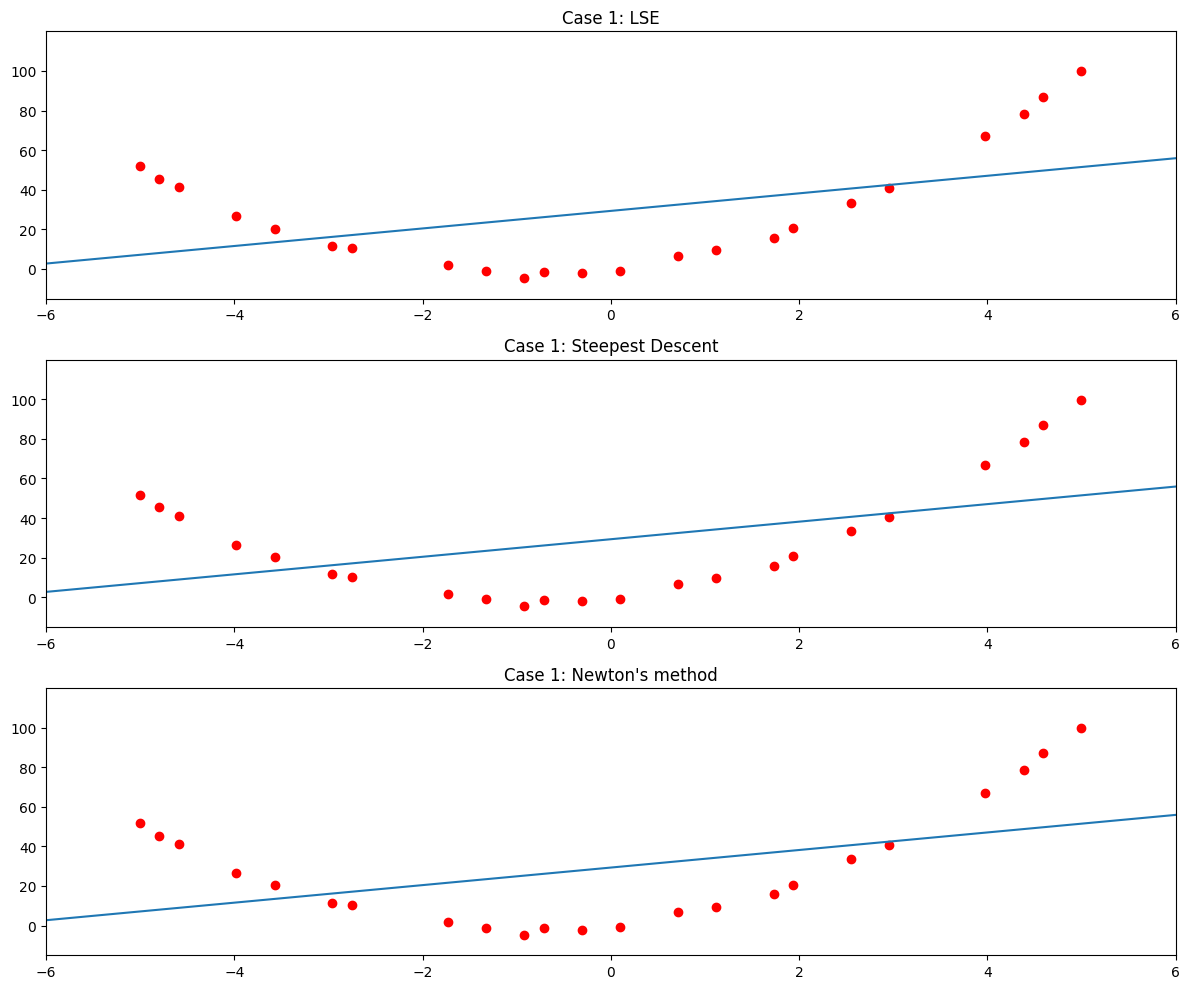

In [122]:

###############################################################
###################### Case 01 #####################
###############################################################
n = 2
λ = 0
print_each_case(1, n, λ, A, b, max_iterations, learning_rate, tolerance, output_folder)


## **Case 2: LSE, Steepest descent, and Newton's method**

Case 2: n = 3, λ = 0

	LSE: 
	Fitting line:   3.0238533934865703x^2 + 4.906190263863797x^1 - 0.23140175608773061
	Total error: 26.559959499333022

	Steepest Descent: 
	Fitting line:   3.0238525917934047x^2 + 4.90619023778848x^1 - 0.2313875819317172
	Total error: 26.559959501402428

	Newton's method: 
	Fitting line:   3.0238533934865717x^2 + 4.906190263863799x^1 - 0.23140175608773134
	Total error: 26.559959499333047



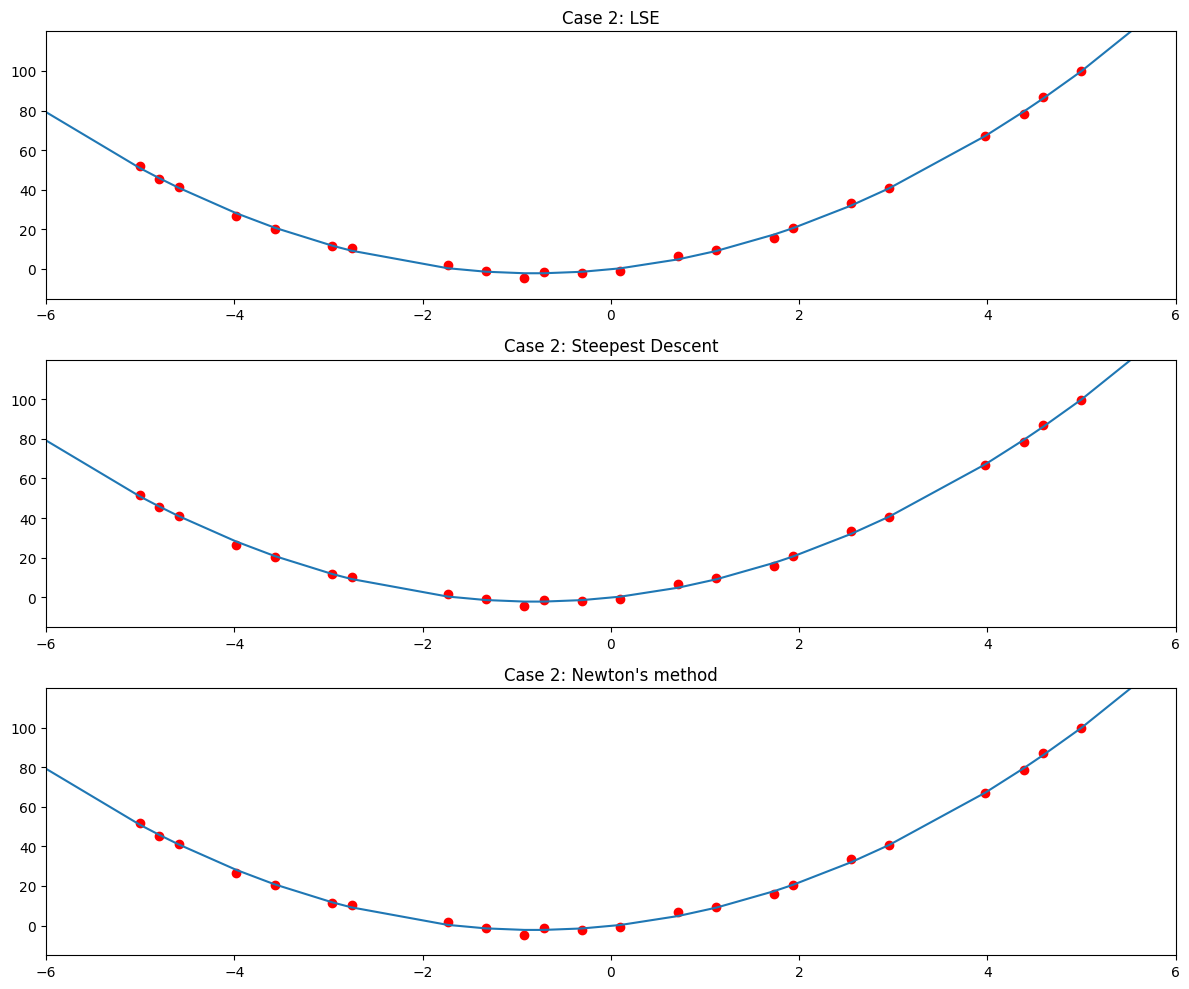

In [123]:

###############################################################
###################### Case 02 #####################
###############################################################
n = 3
λ = 0
print_each_case(2, n, λ, A, b, max_iterations, learning_rate, tolerance, output_folder)


## **Case 3: LSE, Steepest descent, and Newton's method**

Case 3: n = 3, λ = 10000

	LSE: 
	Fitting line:   0.834533282700286x^2 + 0.09314819831918814x^1 + 0.04695069927346928
	Total error: 22649.738493024146

	Steepest Descent: 
	Fitting line:   0.42074639146667087x^2 + 0.04258849564437217x^1 - 0.33364356953727403
	Total error: 30763.431234593278

	Newton's method: 
	Fitting line:   3.0238533934865717x^2 + 4.906190263863799x^1 - 0.23140175608773134
	Total error: 26.559959499333047



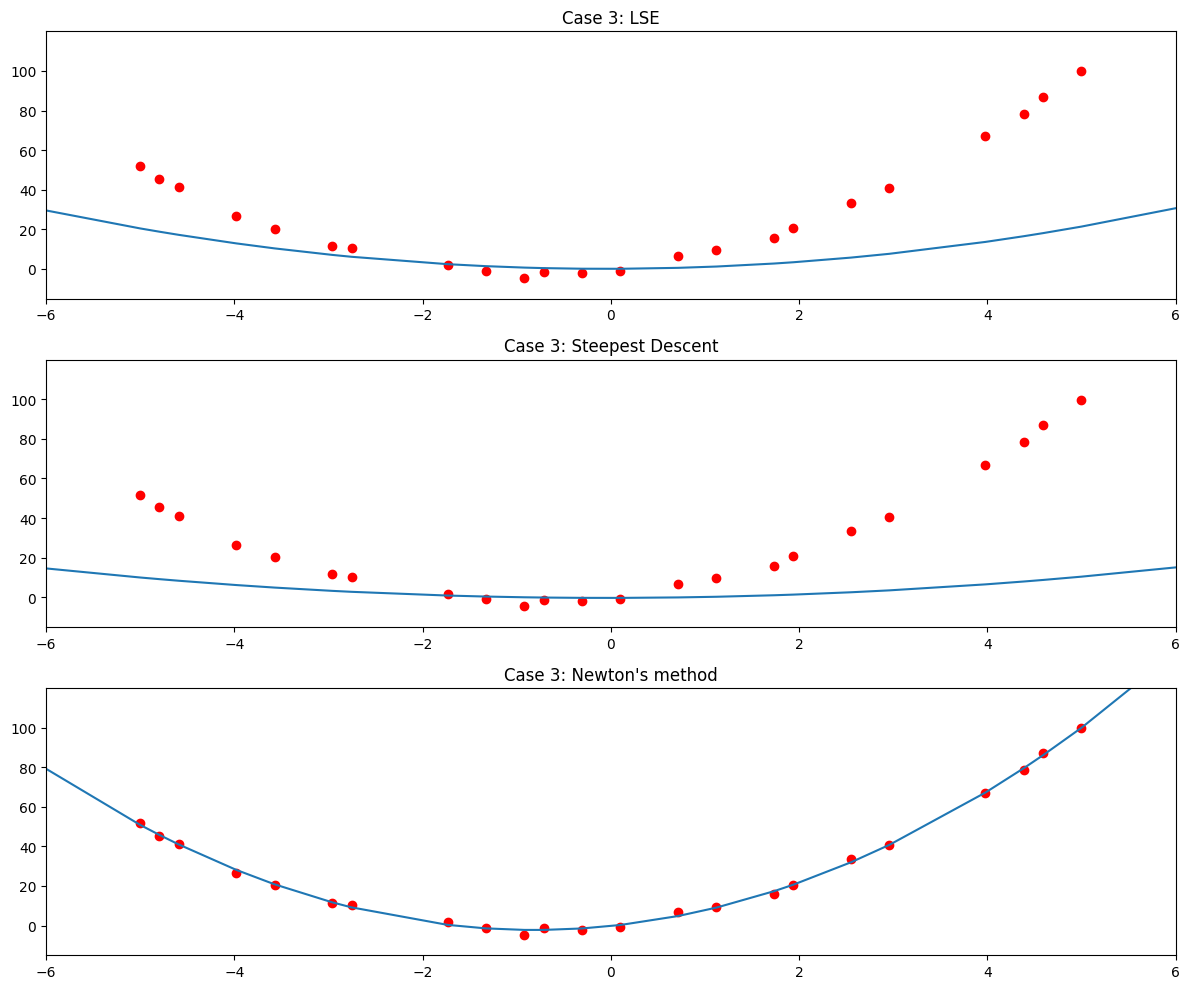

In [124]:

###############################################################
###################### Case 03 #####################
###############################################################
n = 3
λ = 10000
print_each_case(3, n, λ, A, b, max_iterations, learning_rate, tolerance, output_folder)


# **End of coding**

In [125]:
perprint("\n\nEnd")
# Close the output file at the end of your code
output_file.close()



End
